In [22]:
import irbasis
from numpy import *

# input parameters
beta, U, Lambda, kps  = 20, 1.0, 10000, array([64, 64, 1]) 

# Generate k mesh and non-interacting band energies
nk, kgrid = prod(kps), [2*pi*arange(kp)/kp for kp in kps]
k1, k2, k3 = meshgrid(kgrid[0], kgrid[1], kgrid[2], indexing='ij')
ek = -2*(cos(k1)+cos(k2))

# irbasis
b = irbasis.load('F', Lambda)
sp_x = b.sampling_points_x(b.dim()-1)
sp_n = b.sampling_points_matsubara(b.dim()-1)
unl = b.compute_unl(sp_n)*sqrt(beta)
ulx = array([b.ulx(None, x) for x in sp_x])*sqrt(2/beta)
    
# start calculation
_if = 1j*pi*outer((2*sp_n+1), ones(nk))/beta
_ek = outer(ones(len(sp_n)), ek) 
gkf = 1.0 / (_if - _ek)
gkl = linalg.lstsq(unl, gkf, rcond=None)[0]
gkt = ulx @ gkl
grt = fft.fftn(gkt.reshape(len(sp_x), kps[0], kps[1], kps[2]), axes=(1,2,3)).reshape(len(sp_x), nk) 
srt = U*U*grt*grt*grt[::-1,:]
res = linalg.lstsq(ulx, srt, rcond=None)
srf = dot(unl, res[0])
skf = fft.ifftn(srf.reshape(len(sp_n), kps[0], kps[1], kps[2]), axes=(1,2,3))/nk/nk

In [32]:
ulx

array([[ 4.81273598, -6.25213374,  7.87006059, ..., -4.53506631,
         4.47778039, -4.42053412],
       [ 4.60606982, -5.96455268,  7.38356369, ...,  4.16446086,
        -4.12903926,  4.09153863],
       [ 4.20083927, -5.40135711,  6.43707123, ..., -3.2938326 ,
         3.27192434, -3.24472983],
       ...,
       [ 4.20083927,  5.40135711,  6.43707123, ...,  3.2938326 ,
         3.27192434,  3.24472983],
       [ 4.60606982,  5.96455268,  7.38356369, ..., -4.16446086,
        -4.12903926, -4.09153863],
       [ 4.81273598,  6.25213374,  7.87006059, ...,  4.53506631,
         4.47778039,  4.42053412]])

Text(0.5, 0, '$\\omega$')

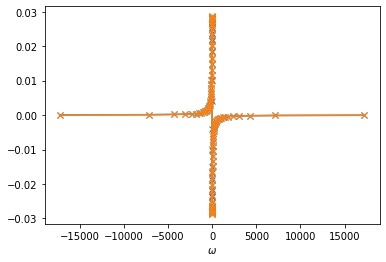

In [33]:
import matplotlib.pyplot as plt


plt.plot(sp_n, skf[:,0,0,0].imag, marker='x')
plt.plot(sp_n, skf[:,0,32,0].imag, marker='x')
plt.xlabel(r"$\omega$")